In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f2cf433c464eaa5762fff828a0c845b


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Avarua"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-159.78,"lat":-21.21},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10n"}],"base":"stations","main":{"temp":71.6,"pressure":1015,"humidity":94,"temp_min":71.6,"temp_max":71.6},"visibility":10000,"wind":{"speed":2.24,"deg":130},"rain":{"3h":3.06},"clouds":{"all":99},"dt":1573209523,"sys":{"type":1,"id":7271,"country":"CK","sunrise":1573228353,"sunset":1573275194},"timezone":-36000,"id":4035715,"name":"Avarua","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -159.78, 'lat': -21.21},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 71.6,
  'pressure': 1015,
  'humidity': 94,
  'temp_min': 71.6,
  'temp_max': 71.6},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 130},
 'rain': {'3h': 3.06},
 'clouds': {'all': 99},
 'dt': 1573209523,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1573228353,
  'sunset': 1573275194},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

42.36 -71.06 39.2 69 75 11.41


datetime.datetime(2019, 11, 8, 8, 3, 36)

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | banmo
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kostomuksha
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 17 of Set 1 | samarai
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | muhos
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | lugo
Processing

Processing Record 37 of Set 4 | egvekinot
Processing Record 38 of Set 4 | mogzon
Processing Record 39 of Set 4 | izumo
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | impfondo
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | sapa
Processing Record 48 of Set 4 | yeroham
Processing Record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | addi ugri
City not found. Skipping...
Processing Record 3 of Set 5 | choya
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | rorvik
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | kudahuvadhoo
Processing Record 9

Processing Record 6 of Set 12 | jabiru
City not found. Skipping...
Processing Record 7 of Set 12 | nanakuli
Processing Record 8 of Set 12 | charyshskoye
Processing Record 9 of Set 12 | fort nelson
Processing Record 10 of Set 12 | alihe
Processing Record 11 of Set 12 | belmonte
Processing Record 12 of Set 12 | coquimbo
Processing Record 13 of Set 12 | brigantine
Processing Record 14 of Set 12 | hay river
Processing Record 15 of Set 12 | taretan
Processing Record 16 of Set 12 | college
Processing Record 17 of Set 12 | ayan
Processing Record 18 of Set 12 | buzmeyin
Processing Record 19 of Set 12 | jalu
Processing Record 20 of Set 12 | kampong thum
Processing Record 21 of Set 12 | sandnessjoen
Processing Record 22 of Set 12 | gravdal
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | qandahar
City not found. Skipping...
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | merauke
Processing Record 27 of Set 12 | pleszew
Processing Record 28 

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2019-11-08 08:18:55,22.08,-159.32,71.60,83,1,8.05
1,Georgetown,GY,2019-11-08 08:21:19,6.80,-58.16,75.20,100,20,4.70
2,Bethel,US,2019-11-08 08:23:08,60.79,-161.76,30.20,100,90,9.17
3,Hermanus,ZA,2019-11-08 08:23:08,-34.42,19.24,63.54,75,3,19.01
4,Carnarvon,ZA,2019-11-08 08:23:09,-30.97,22.13,69.80,15,1,10.07
5,Rikitea,PF,2019-11-08 08:23:09,-23.12,-134.97,74.14,82,67,7.52
6,Busselton,AU,2019-11-08 08:23:09,-33.64,115.35,75.69,49,0,7.52
7,Cape Town,ZA,2019-11-08 08:20:02,-33.93,18.42,69.80,43,0,5.82
8,Faanui,PF,2019-11-08 08:23:10,-16.48,-151.75,80.98,80,18,18.99
9,Saskylakh,RU,2019-11-08 08:23:10,71.97,114.09,-25.10,98,10,6.85


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

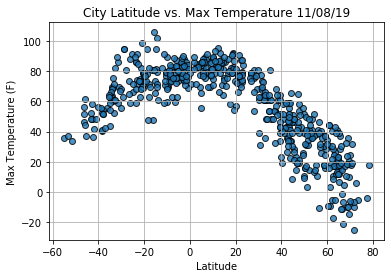

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

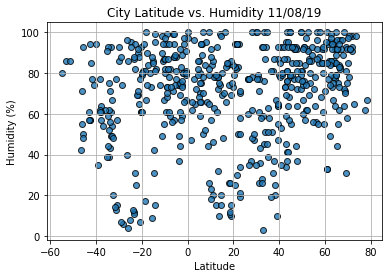

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

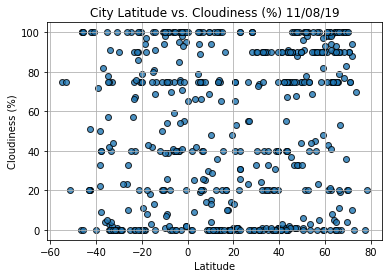

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

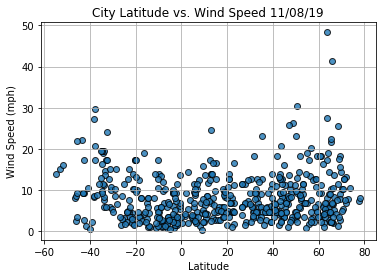

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

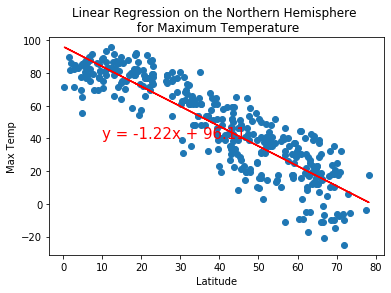

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

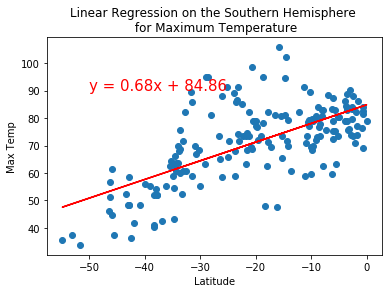

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

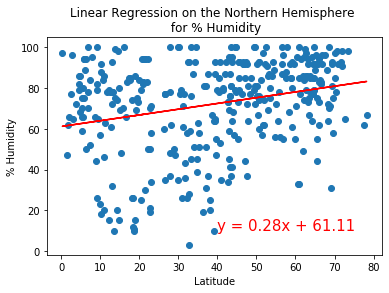

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

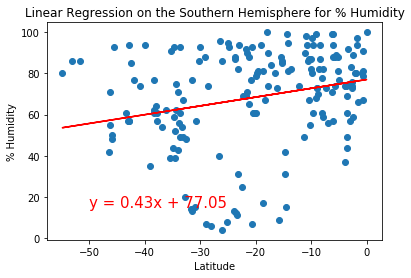

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

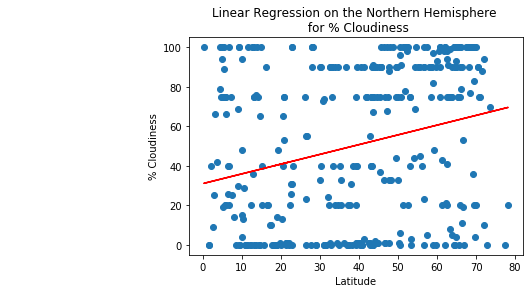

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

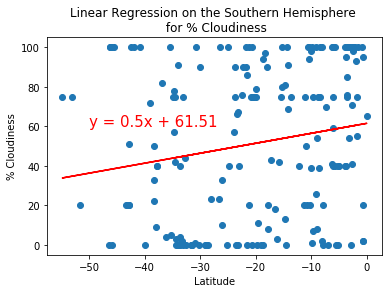

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

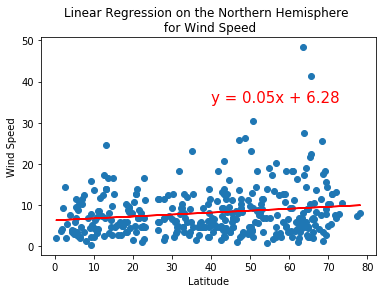

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

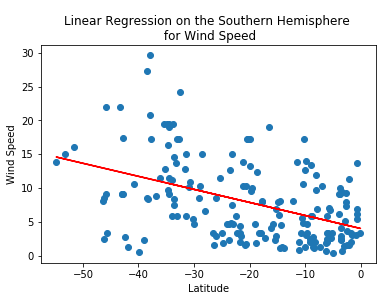

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))